In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Reading a data

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


# Exploratory Data Analysis

In [4]:
df.shape

(512087, 11)

In [5]:
df.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [6]:
df.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

#### Missing Values

In [7]:
df.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [8]:
### Finding the % of missing variables
features_with_nan=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean(),4),"% missing values")

Competition_Metric 0.0034 % missing values


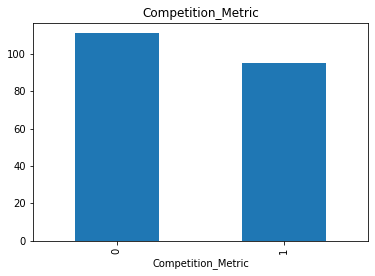

In [9]:
for feature in features_with_nan:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Sales'].median().plot(kind="bar")
    plt.title(feature)
    plt.show()

INFERENCE
-  Since there is some importance of NAN values, we will replace in Feature Engineering.

#### Numerical Variables

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!="O"]
print(numerical_features)
print()
print("Total Number of Numerical Features is:",len(numerical_features))
print()
df[numerical_features].head()

['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales']

Total Number of Numerical Features is: 9



,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,0,1,1,11004,0.007,81
1,2,2,1,0,0,1,13650,0.007,79
2,3,3,1,0,0,1,11655,0.007,75
3,4,4,1,0,0,1,12054,0.007,80
4,5,5,1,0,0,1,6804,0.007,41


Numerical Variables divided into two types
- Discrete Variables
- Continous Variables

#### Discrete Variables

In [11]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print(discrete_features)
print()
print("Total Number of Discrete Features is:",len(discrete_features))
print()
df[discrete_features].head()

['Short_Promotion', 'Public_Holiday', 'Long_Promotion']

Total Number of Discrete Features is: 3



,Short_Promotion,Public_Holiday,Long_Promotion
0,0,1,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


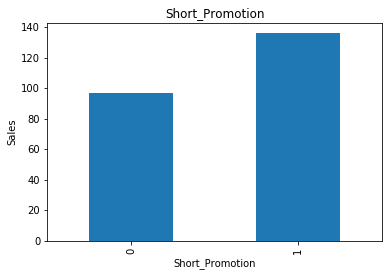

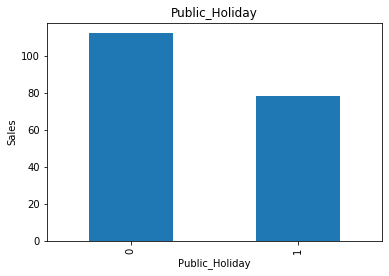

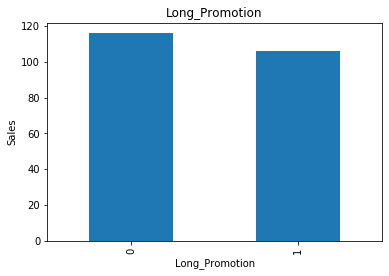

In [12]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)["Sales"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.title(feature)
    plt.show()

INFERENCE
1. When short_promotion is true then there is high in sales.
2. when public_holiday is true then there is low in sales.
3. When long_promotion is true then there is some low in sales.

 - Short_promotion is more efficient than Long_promotion.

#### Continous Variables

In [13]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features + ["ID","Day_No"]  ]
print(continous_features)
print()
print("Total number of Continous Variables is:",len(continous_features))
print()
df[continous_features].head()

['Course_ID', 'User_Traffic', 'Competition_Metric', 'Sales']

Total number of Continous Variables is: 4



,Course_ID,User_Traffic,Competition_Metric,Sales
0,1,11004,0.007,81
1,1,13650,0.007,79
2,1,11655,0.007,75
3,1,12054,0.007,80
4,1,6804,0.007,41


INFERENCE
- Since ID and Day_No is not so much important we can drop.

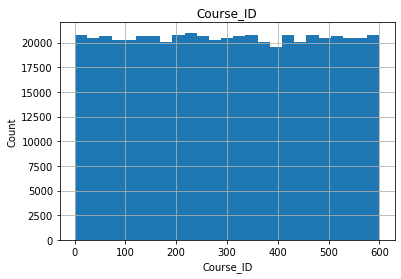

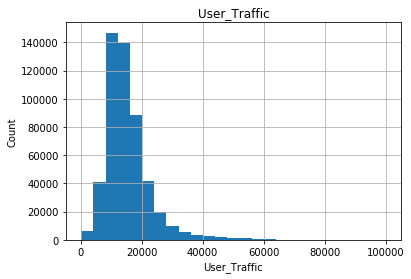

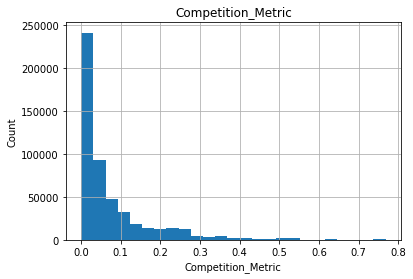

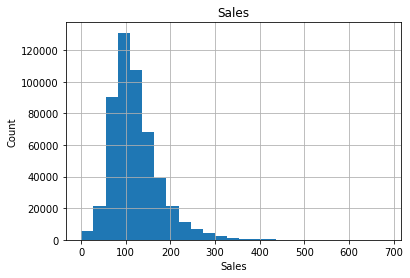

In [14]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

INFERENCE
- Different types of distributions, if it is skewed we will do log transform.

C:\Users\Kasturi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


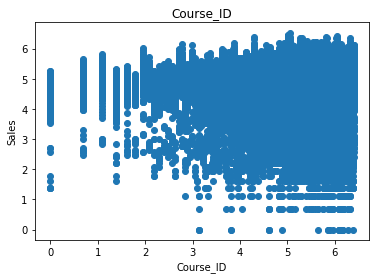

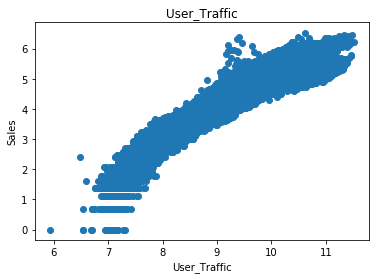

In [15]:
## We will be using logarithmic transformation



for feature in continous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["Sales"]=np.log(data["Sales"])
        plt.scatter(data[feature],data["Sales"])
        plt.xlabel(feature)
        plt.ylabel("Sales")
        plt.title(feature)
        plt.show()

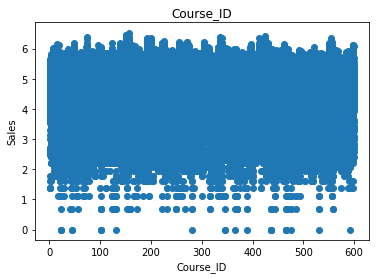

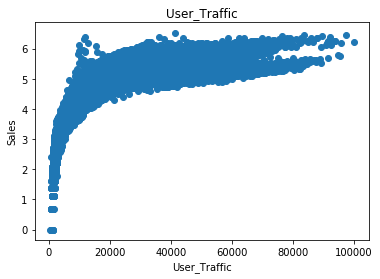

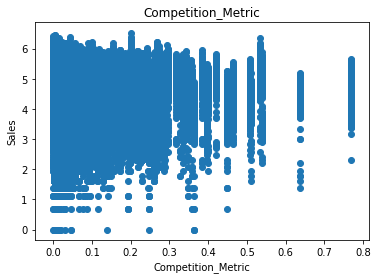

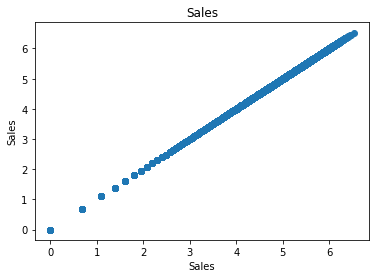

In [16]:
for feature in continous_features:
    data=df.copy()
    data["Sales"]=np.log(data["Sales"])
    plt.scatter(data[feature],data["Sales"])
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.title(feature)
    plt.show()

#### Categorical Variables

In [17]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=="O"]
print(categorical_features)
print()
print("Total number of Categorical Variables are:",len(categorical_features))
print()
df[categorical_features].head()

['Course_Domain', 'Course_Type']

Total number of Categorical Variables are: 2



,Course_Domain,Course_Type
0,Development,Course
1,Development,Course
2,Development,Course
3,Development,Course
4,Development,Course


#### Cardinality Values (it means How many different categories we have inside in the categorical variables)

In [18]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feature is Course_Domain and number of categories are 4
The feature is Course_Type and number of categories are 3


#### Relationship between categorical variable and dependent feature SalesPrice

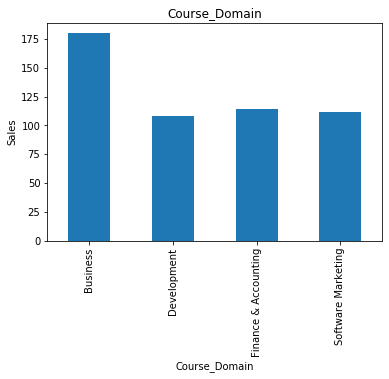

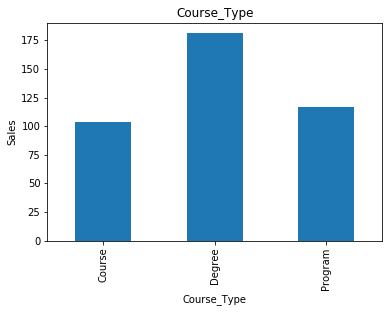

In [19]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)["Sales"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.title(feature)
    plt.show()

INFERENCE
1. In Course_Domain
 - for sales Business > Finance&Accounting > Software Marketing > Development
2. In Course_Type
 - for sales Degree > Program > Course

#### Outliers

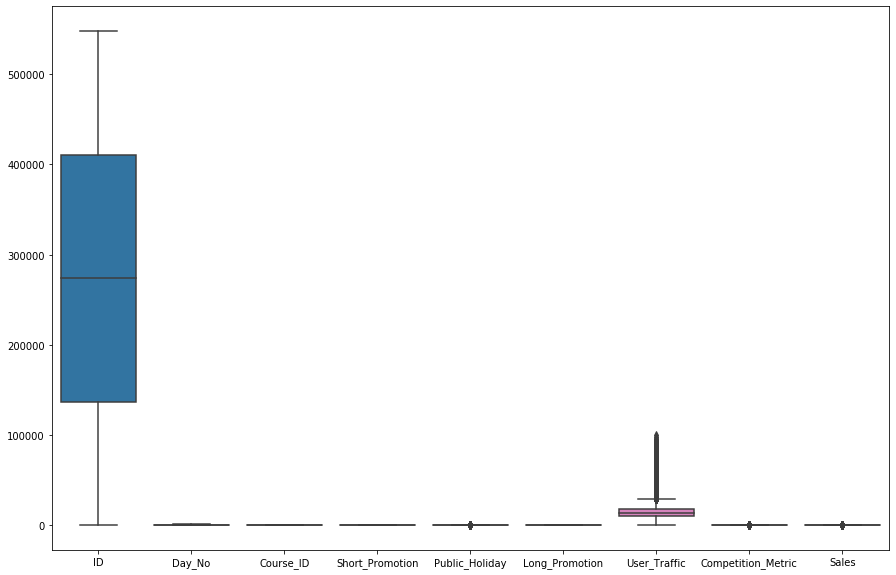

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

INFERENCE
-  There are some outliers.

# Feature Engineering

#### Capping for outliers

In [21]:
x=pd.DataFrame(df.describe())
x

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [22]:
for i in df[numerical_features]:
    q1=x.loc["25%",i]
    q3=x.loc["75%",i]
    iqr = q3-q1
    uppl = q3+(1.5*iqr)
    lowl = q1-(1.5*iqr)
    uppl,lowl
    df[i] = df[i].apply(lambda x: uppl if x>uppl else x)
    df[i] = df[i].apply(lambda x: lowl if x<lowl else x)

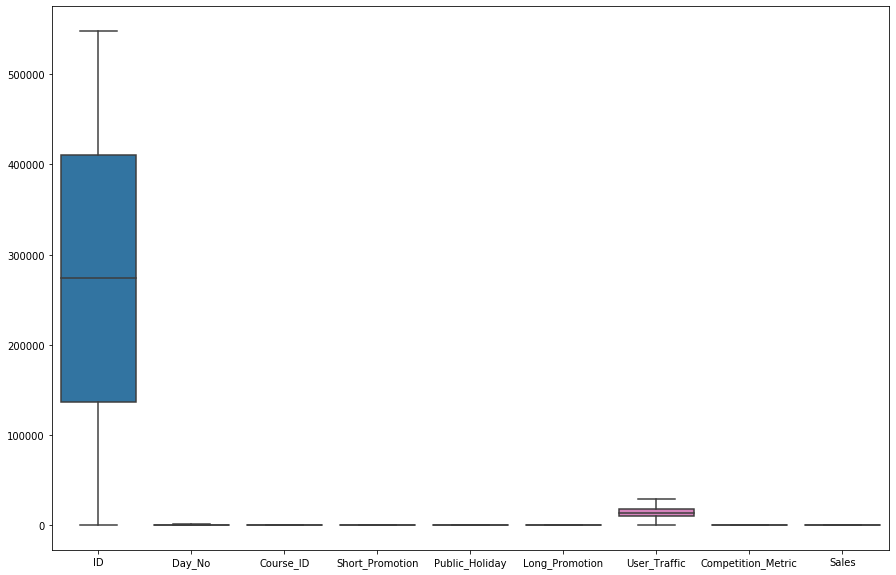

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

INFERENCE
-  After capping there are no outliers.

#### Imputing Missing Variables

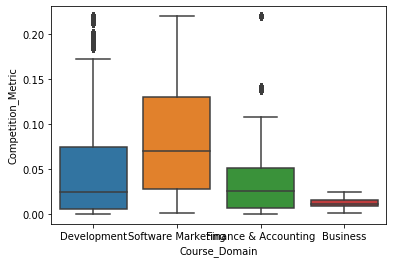

In [24]:
sns.boxplot(x='Course_Domain',y='Competition_Metric',data=df)

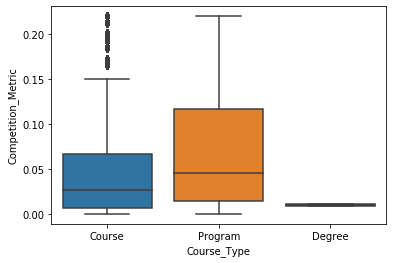

In [25]:
sns.boxplot(x='Course_Type',y='Competition_Metric',data=df)

INFERENCE
- We will use means of course_domain with respect to competition_metric to impute the missing values in competition_metric.

In [26]:
df.groupby("Course_Domain")["Competition_Metric"].mean()

Course_Domain
Business                0.012200
Development             0.056681
Finance & Accounting    0.039149
Software Marketing      0.087668
Name: Competition_Metric, dtype: float64

In [27]:
def impute_competition_metric(cols):
    Competition_Metric=cols[0]
    Course_Domain=cols[1]
    if pd.isnull(Competition_Metric):
        if Course_Domain=="Business":
            return 0.012200
        elif Course_Domain=="Development":
            return 0.056681
        elif Course_Domain=="Finance & Accounting":
            return 0.039149
        else:
            return 0.087668
    else:
        return Competition_Metric

In [28]:
### Now applying the function in data

df["Competition_Metric"]=df[["Competition_Metric","Course_Domain"]].apply(impute_competition_metric,axis=1)

In [29]:
df.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

#### Categorical Variables

In [30]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])["Sales"].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [31]:
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,0,0,0,0.0,1,11004.0,0.007,81.0
1,2,2,1,0,0,0,0.0,1,13650.0,0.007,79.0
2,3,3,1,0,0,0,0.0,1,11655.0,0.007,75.0
3,4,4,1,0,0,0,0.0,1,12054.0,0.007,80.0
4,5,5,1,0,0,0,0.0,1,6804.0,0.007,41.0


In [32]:
scaling_feature=[feature for feature in df.columns if feature not in ["ID","Day_No","Sales"] ]
len(scaling_feature)

8

# Feature Scaling

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df["Sales"],test_size=0.3,random_state=101)

In [34]:
X_train.shape, X_test.shape

((358460, 11), (153627, 11))

In [35]:
feature_scale=[feature for feature in df.columns if feature not in ["ID","Day_No","Sales"]]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
scaler.transform(df[feature_scale])

array([[0.        , 0.        , 0.        , ..., 1.        , 0.37029064,
        0.03181818],
       [0.        , 0.        , 0.        , ..., 1.        , 0.46071044,
        0.03181818],
       [0.        , 0.        , 0.        , ..., 1.        , 0.39253678,
        0.03181818],
       ...,
       [1.        , 0.33333333, 0.5       , ..., 1.        , 0.46142806,
        0.31818182],
       [1.        , 0.33333333, 0.5       , ..., 1.        , 0.29852888,
        0.31818182],
       [1.        , 0.33333333, 0.5       , ..., 1.        , 0.3853606 ,
        0.31818182]])

In [37]:
df=pd.concat([df[["ID","Day_No","Sales"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [38]:
df.head()

,ID,Day_No,Sales,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric
0,1,1,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.370291,0.031818
1,2,2,79.0,0.0,0.0,0.0,0.0,0.0,1.0,0.460710,0.031818
2,3,3,75.0,0.0,0.0,0.0,0.0,0.0,1.0,0.392537,0.031818
3,4,4,80.0,0.0,0.0,0.0,0.0,0.0,1.0,0.406172,0.031818
4,5,5,41.0,0.0,0.0,0.0,0.0,0.0,1.0,0.226767,0.031818


# Feature Selection

In [39]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [40]:
## Capture the dependent feature
y_train=df[["Sales"]]

In [41]:
## drop dependent feature from dataset
X_train=df.drop(["ID","Day_No","Sales"],axis=1)

In [42]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [43]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True])

In [44]:
selected_feat=X_train.columns[(feature_sel_model.get_support())]

In [45]:
selected_feat

Index(['Course_ID', 'Course_Domain', 'Course_Type', 'Short_Promotion',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric'],
      dtype='object')

In [46]:
len(selected_feat)

7

In [47]:
X_train=X_train[selected_feat]

In [48]:
X_train.head()

,Course_ID,Course_Domain,Course_Type,Short_Promotion,Long_Promotion,User_Traffic,Competition_Metric
0,0.0,0.0,0.0,0.0,1.0,0.370291,0.031818
1,0.0,0.0,0.0,0.0,1.0,0.460710,0.031818
2,0.0,0.0,0.0,0.0,1.0,0.392537,0.031818
3,0.0,0.0,0.0,0.0,1.0,0.406172,0.031818
4,0.0,0.0,0.0,0.0,1.0,0.226767,0.031818


INFERENCE
-  We need to do Linear Regression for the above data.

# Regression Models

### OLS Regression Model

In [49]:
X=X_train
y=df["Sales"]

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [51]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

C:\Users\Kasturi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.874e+05
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:21:43   Log-Likelihood:            -2.3066e+06
No. Observations:              512087   AIC:                         4.613e+06
Df Residuals:                  512079   BIC:                         4.613e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6145      0.120    -38.323      0.000      -4.850      -4.378
Course_ID             -1.1908      0.106    -11.233      0.000      -1.399      -0.983
Course_Domain          4.7951      0.122     39.371      0.000       4.556       5.034
Course_Type           15.8840      0.123    128.720      0.000      15.642      16.126
Short_Promotion       18.4163      0.065    283.255      0.000      18.289      18.544
Long_Promotion         9.6329      0.064    151.219      0.000       9.508       9.758
User_Traffic         201.3044      0.162   1241.562      0.000     200.987     201.622
Competition_Metric    21.8748      0.100    218.788      0.000      21.679      22.071
==============================================================================
Omnibus:                    17417.890   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24954.404
Skew:                           0.351   Prob(JB):                         0.00
Kurtosis:                       3.822   Cond. No.                         9.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
y_pred=model.predict(Xc)
y_pred

0          80.255585
1          98.457486
2          84.733831
3          87.478562
4          51.363680
             ...    
512082     80.423372
512083     91.691215
512084    113.215685
512085     80.423372
512086    116.319270
Length: 512087, dtype: float64

Text(0.5, 0, 'y_predict')

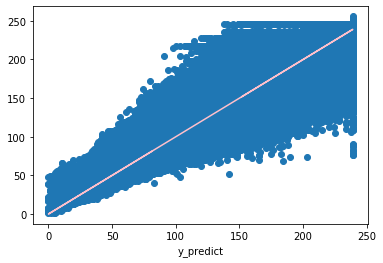

In [53]:
plt.scatter(x=y,y=y_pred)
plt.plot(y,y,"pink")
plt.xlabel("y_actual")
plt.xlabel("y_predict")

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [58]:
cols=list(selected_feat)
cols

['Course_ID',
 'Course_Domain',
 'Course_Type',
 'Short_Promotion',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.30, random_state=111)

In [61]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
coeff=pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficents"])
coeff

,Coefficents
Course_ID,-1.277423
Course_Domain,4.669819
Course_Type,15.823015
Short_Promotion,18.388984
Long_Promotion,9.618754
User_Traffic,201.384225
Competition_Metric,21.891027


In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

print("r-squared for Train:",r2_score(y_train,y_train_pred))
print("RMSE for Train:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print()
print("r-squared for Test:",r2_score(y_test,y_test_pred))
print("RMSE for Test:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

r-squared for Train: 0.7975468540888976
RMSE for Train: 21.84847375722653

r-squared for Test: 0.7961039796928958
RMSE for Test: 21.9349736636187


In [70]:
df_act_pred=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred,"Error":y_test-y_test_pred})
df_act_pred.head(20)

,Actual,Predicted,Error
509841,220.0,154.529930,65.470070
28854,171.0,156.206467,14.793533
190072,96.0,82.298010,13.701990
490067,77.0,93.659293,-16.659293
503553,99.0,100.001635,-1.001635
11980,100.0,87.108927,12.891073
133816,239.0,192.128158,46.871842
175468,87.0,99.331403,-12.331403
345923,153.0,141.808499,11.191501
251083,75.0,72.707989,2.292011


In [76]:
df_act_pred_graph=df_act_pred.head(10)

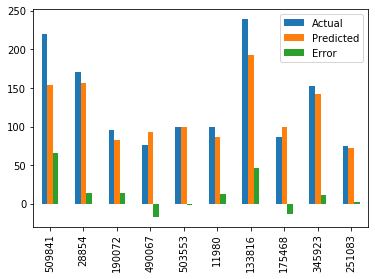

In [78]:
df_act_pred_graph.plot(kind="bar")

In [79]:
regressor.intercept_

-4.573709137992708

In [81]:
Error=list(y_test-y_test_pred)

In [82]:
sum(Error)

8784.6298032477

In [83]:
8784.6298032477**.5

93.72635596910669